## Spin coating notebook


The goal of this exercise is to deposite the main and lift-off photoresists uniformly on the wafer, to prepare for the photolithography and lift-off steps.
To do so, the main resist used is called ["AZ 1512 HS"](https://www.epfl.ch/research/facilities/cmi/process/photolithography/photoresist-selection/az-1512-hs/) and the lift-off resist (LOR) is the ["LOR 5A"](https://www.epfl.ch/research/facilities/cmi/process/photolithography/photoresist-selection/lor-5a/), both available in CMi. 
The thickness that you will deposite is crucial to be able to developpe correctly the resists.
The goal of this exercise is to generate the two curves of thickness [$\mu m$] in function of the rotation speed [$rpm$], so that you can choose the correct parameters on the machine.
For the resists mentionned above, the relation between the two variables is expressed as :
\begin{equation}
T = \alpha \cdot \omega^\beta [\mu m]
\end{equation}

with $\alpha_{main}$ = 94.67679 and $\beta_{main}$ = 0.52672 and $\alpha_{LOR}$ = 34.41502 and $\beta_{LOR}$ = 0.51553 

Now, it's your turn to generate the thickness/rotation speed curve. To do so, create an array of rotation speed with the ["np.array function"](https://numpy.org/doc/stable/reference/generated/numpy.array.html)






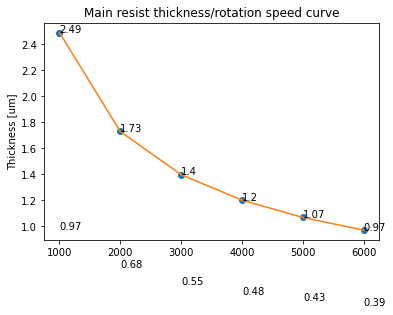

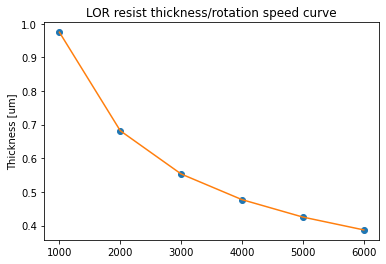

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

alpha_main = 94.67679
beta_main = 0.52672
alpha_LOR = 34.31502
beta_LOR = 0.51553
omega_main = np.array([1000, 2000, 3000, 4000, 5000, 6000])
omega_LOR = np.array([1000, 2000, 3000, 4000, 5000, 6000])

t_main = alpha_main*(omega_main**-beta_main)
t_LOR = alpha_LOR*(omega_LOR**-beta_LOR)
interp_main = interpolate.interp1d(omega_main,t_main)
interp_LOR = interpolate.interp1d(omega_LOR,t_LOR)


for i,j in zip(omega_main, t_main):
    plt.text(i, j, round(float(j),2))
for i,j in zip(omega_LOR, t_LOR):
    plt.text(i, j, round(float(j),2))
plt.title('Main resist thickness/rotation speed curve')
plt.plot(omega_main, interp_main(omega_main), 'o', omega_main, t_main)
plt.ylabel('Rotation speed [rpm]')
plt.ylabel('Thickness [um]')
plt.show()

plt.title('LOR resist thickness/rotation speed curve')
plt.plot(omega_LOR, interp_LOR(omega_LOR), 'o', omega_LOR, t_LOR)
plt.ylabel('Rotation speed [rpm]')
plt.ylabel('Thickness [um]')
plt.show()

Based on the plot above, what rpm would you choose ?


In [87]:
omega_main = 1000
omega_LOR = 1000

In [110]:
from ipycanvas import Canvas
#creation of the substrate
canvas = Canvas(size=(500, 500))
canvas.fill_text('Si wafer', 580, 130)
canvas.fill_text('Oxidation layer ~2um', 580, 95)
height_LOR = round(alpha_LOR*(omega_LOR**-beta_LOR),2)
height_main = round(alpha_main*(omega_main**-beta_main),2)

canvas.fill_text('Lift-off resist ' + str(height_LOR) + ' um', 580, 85- 10*alpha_LOR*(omega_LOR**-beta_LOR))
canvas.fill_text('Main resist ' + str(height_main) + ' um', 580, 65- 10*alpha_LOR*(omega_LOR**-beta_LOR))
canvas.stroke_style = 'black'
canvas.fill_rect(350, 100, 200, 50) #x, y, width, height
canvas.stroke_rect(350, 100, 200, 50)


#creation of the oxide layer
canvas.fill_style = '#d3d3d3'
canvas.stroke_style = '#d3d3d3'
canvas.fill_rect(350, 78, 200, 22) #x, y, width, height
canvas.stroke_rect(350, 78, 200, 22)


#creation of the LOR resist in function of the thickness that has been deposited
canvas.stroke_style = 'black'
canvas.fill_style = 'green'
canvas.stroke_style = 'green'
canvas.fill_rect(350, 78- 10*alpha_LOR*(omega_LOR**-beta_LOR), 200,  10*alpha_LOR*(omega_LOR**-beta_LOR)) #x, y, width, height
canvas.stroke_rect(350,950, 200, 50)

#creation of the main resist in function of the thickness that has been deposited
canvas.fill_style = 'blue'
canvas.stroke_style = 'blue'
canvas.fill_rect(350, 78- 10*alpha_main*(omega_main**-beta_main)-10*alpha_LOR*(omega_LOR**-beta_LOR), 200,  10*alpha_main*(omega_main**-beta_main)) #x, y, width, height
canvas.stroke_rect(350,950, 200, 50)



#display the result
canvas

Canvas()

<div class="alert-success"> Propose different solutions ; the student should response "HMDS process" to improve the adhesion. One possibility is to show wafers after spin coating with and without HMDS (see the difference when we put water on each wafer)
</div>

### Block II
<div class="alert-info">
Propose different resists with different properties (need to be determined, depends on the final goal of the process --> discuss with Hernan)
</div>


<div class="alert-danger">
Which resist would you chose, considering the final application and specifications of the process ?
</div>

<div class="alert-success">
If the resist is not the correct one, explain the caracteristics of the chosen one and why this is not a good choice ; go back to the next step !
</div>

### Block III 
<div class="alert-info">
Presentation of an interactive exercise ; introduce the formula of the course that allows to determine the thickness of the resist based on different parameters (concentration of the resist, rotation speed, etc.)
</div>

<div class="alert-danger">
Implement the main part of the code to generate the curve and/or the final thickness, based on the parameters determined by the student. The student will apply the parameters and this will generate the curve until the correct parameters are selected.
</div>

\begin{equation}
T = K C^\beta \eta^\gamma / \omega^\alpha
\end{equation}

### Block IV 
<div class="alert-info">
In reality, the desired thickness is never exact due to multiple reasons ; cite them (need to be discussed with Hernan)
</div>

<div class="alert-danger">
Which step could be here useful to check the thickness that has been deposited ? Different methods are presented (mechanical, ellipsometer), the student should be able to answer correctly
</div>

### Block V 
<div class="alert-info">
This section will present real cases ; show different screenshots obtained with the ellipsometer and chose the one that seems realistic, since the process has been done by someone with experience
</div>